In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [9]:
# 替换为您的CSV文件路径
file_path = "/Users/zyt/Desktop/DL_finalproject/GridResult/grid_result.csv"

data = pd.read_csv(file_path)

# 展开 params 列，将字典中的键值对展开为单独的列
params_df = data['params'].apply(eval).apply(pd.Series)

# 将展开的列合并到原始 DataFrame 中
data = pd.concat([data, params_df], axis=1)

# 查看新的 DataFrame 结构，确认是否成功展开
print(data.head())


sns.set_theme(style="whitegrid", palette="muted")


   param_index                                             params  \
0            1  {'num_layers': 1, 'units_per_layer': 2, 'activ...   
1            2  {'num_layers': 1, 'units_per_layer': 2, 'activ...   
2            3  {'num_layers': 1, 'units_per_layer': 2, 'activ...   
3            4  {'num_layers': 1, 'units_per_layer': 2, 'activ...   
4            5  {'num_layers': 1, 'units_per_layer': 2, 'activ...   

             strategy  train_loss  val_loss  train_accuracy  val_accuracy  \
0  your_strategy_name    2.301336  2.297811       11.300000          13.4   
1  your_strategy_name    1.867037  1.871776       23.700000          24.2   
2  your_strategy_name    2.300607  2.297488       10.833333          11.0   
3  your_strategy_name    1.891567  1.941337       21.433333          24.0   
4  your_strategy_name    2.300960  2.298644       10.833333          11.0   

   training_time  total_training_time  num_layers  units_per_layer activation  \
0      11.211747            11.211747    

In [26]:
for col in params_df.columns:
    unique_values = params_df[col].unique()
    print(f"{col} 的离散取值为: {unique_values}")

num_layers 的离散取值为: [1 2 3 4]
units_per_layer 的离散取值为: [  2  44  86 128]
activation 的离散取值为: ['relu' 'tanh' 'sigmoid']
learning_rate 的离散取值为: [1.00000000e-04 1.44224957e-03 2.08008382e-02 3.00000000e-01]
batch_size 的离散取值为: [ 16  32  64 128 256]
dropout_rate 的离散取值为: [0.05       0.23333333 0.41666667 0.6       ]
l2_reg_strength 的离散取值为: [1.00000000e-07 4.64158883e-06 2.15443469e-04 1.00000000e-02]


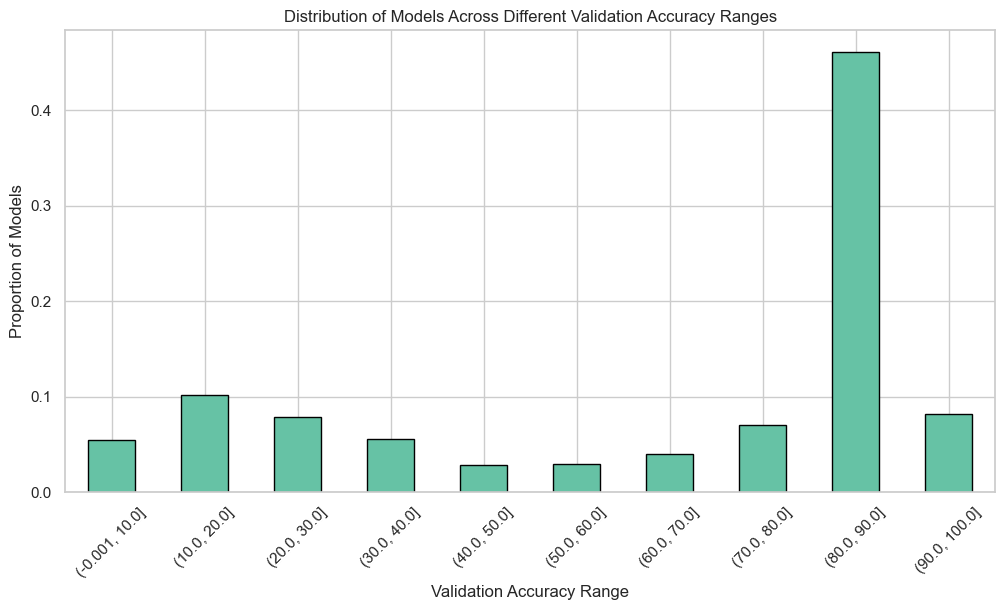

In [23]:

# 将验证精度划分为区间，保留空区间
accuracy_bins = pd.cut(data['val_accuracy'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80,90, 100], include_lowest=True)
accuracy_counts = accuracy_bins.value_counts(normalize=True, sort=False, dropna=False)

# 绘制条形图，展示不同精度区间的模型数量占比
plt.figure(figsize=(12, 6))
accuracy_counts.plot(kind='bar', color="#66c2a5", edgecolor="black")
plt.xlabel("Validation Accuracy Range")
plt.ylabel("Proportion of Models")
plt.title("Distribution of Models Across Different Validation Accuracy Ranges")
plt.xticks(rotation=45)
plt.show()



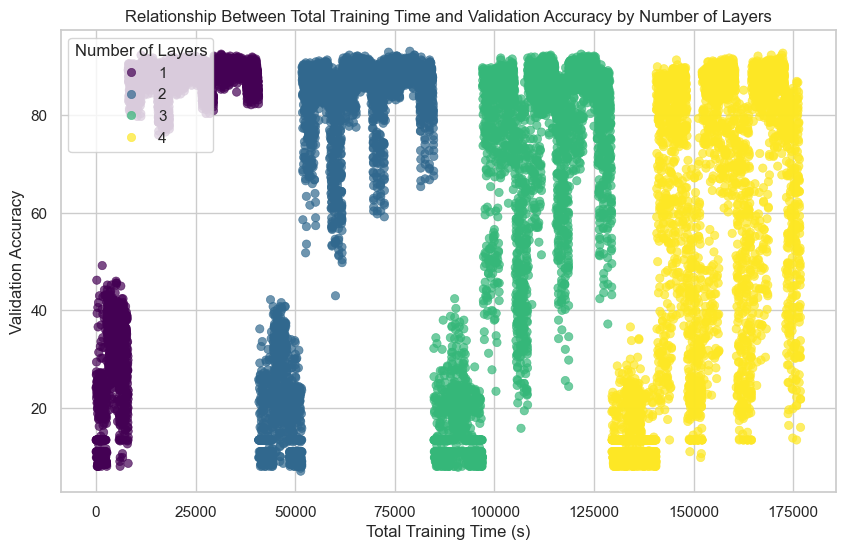

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data, x='total_training_time', y='val_accuracy', 
    hue='num_layers',  # 根据层数区分颜色
    palette="viridis",  # 使用颜色调色板
    alpha=0.7, edgecolor=None
)
plt.xlabel("Total Training Time (s)")
plt.ylabel("Validation Accuracy")
plt.title("Relationship Between Total Training Time and Validation Accuracy by Number of Layers")
plt.legend(title='Number of Layers', loc='upper left')  # 添加图例，标明层数
plt.show()

/var/folders/dz/ffb7x_vj5vl9758_4vqfvj3m0000gn/T/ipykernel_13894/1936407070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="num_layers", y="val_accuracy", data=data, palette="muted")


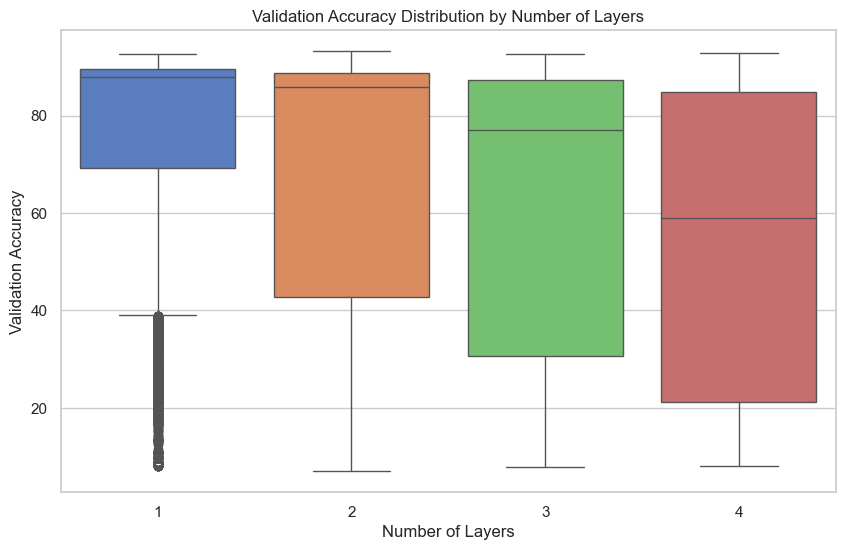

/var/folders/dz/ffb7x_vj5vl9758_4vqfvj3m0000gn/T/ipykernel_13894/1936407070.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="units_per_layer", y="val_accuracy", data=data, palette="muted")


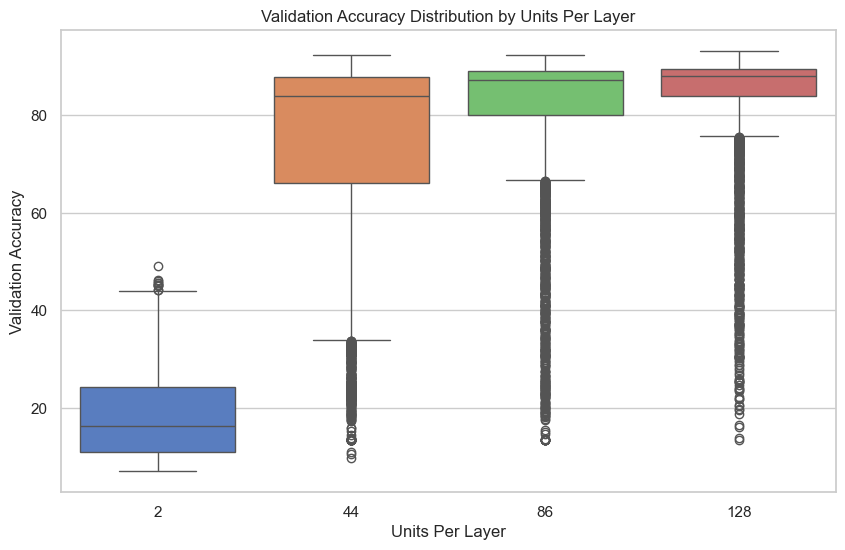

/var/folders/dz/ffb7x_vj5vl9758_4vqfvj3m0000gn/T/ipykernel_13894/1936407070.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="activation", y="val_accuracy", data=data, palette="muted")


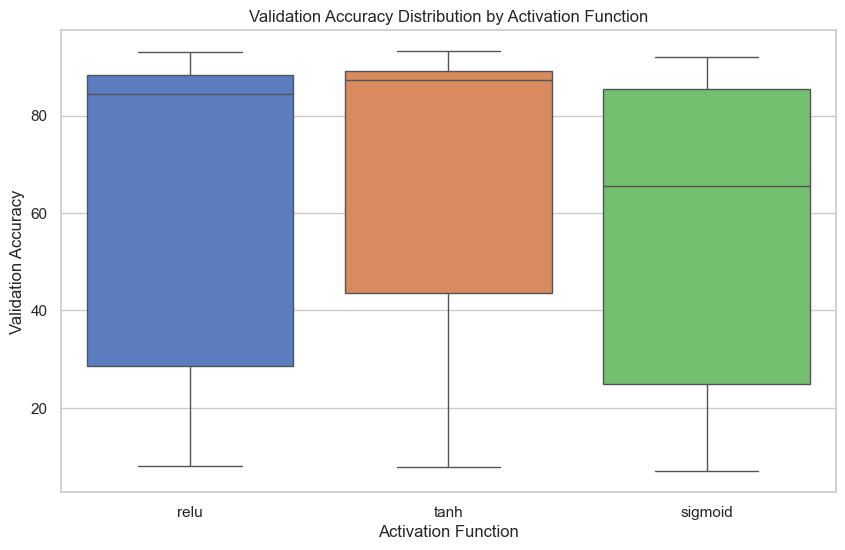

In [20]:
# 以 num_layers 为例展示精度分布
plt.figure(figsize=(10, 6))
sns.boxplot(x="num_layers", y="val_accuracy", data=data, palette="muted")
plt.xlabel("Number of Layers")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Distribution by Number of Layers")
plt.show()

# 以 units_per_layer 为例展示精度分布
plt.figure(figsize=(10, 6))
sns.boxplot(x="units_per_layer", y="val_accuracy", data=data, palette="muted")
plt.xlabel("Units Per Layer")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Distribution by Units Per Layer")
plt.show()

# 以 activation 为例展示精度分布
plt.figure(figsize=(10, 6))
sns.boxplot(x="activation", y="val_accuracy", data=data, palette="muted")
plt.xlabel("Activation Function")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Distribution by Activation Function")
plt.show()


1524


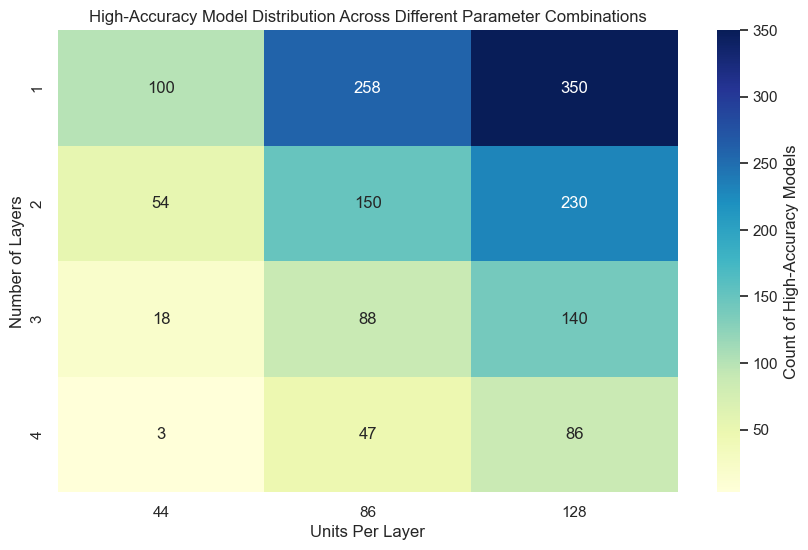

In [25]:
# 筛选出高精度模型（val_accuracy >= 90%）
high_accuracy_data = data[data['val_accuracy'] >= 90]
print(len(high_accuracy_data))
# 分析高精度模型的 num_layers 和 units_per_layer 组合
heatmap_data = high_accuracy_data.groupby(['num_layers', 'units_per_layer']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Count of High-Accuracy Models'})
plt.xlabel("Units Per Layer")
plt.ylabel("Number of Layers")
plt.title("High-Accuracy Model Distribution Across Different Parameter Combinations")
plt.show()


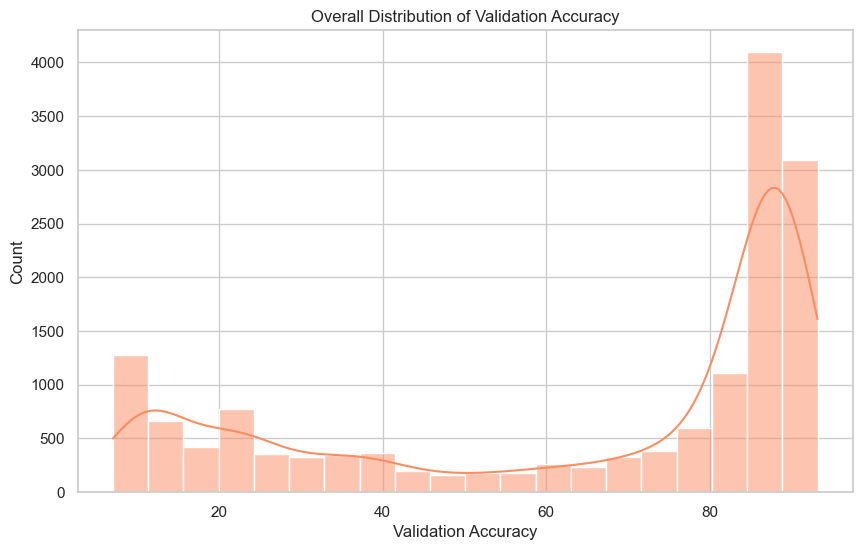

In [16]:
# 3. 总体精度分布
plt.figure(figsize=(10, 6))
sns.histplot(data['val_accuracy'], kde=True, color="#fc8d62", bins=20)
plt.xlabel("Validation Accuracy")
plt.ylabel("Count")
plt.title("Overall Distribution of Validation Accuracy")
plt.show()

/var/folders/dz/ffb7x_vj5vl9758_4vqfvj3m0000gn/T/ipykernel_13894/2061616234.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="num_layers", y="val_accuracy", data=data, palette="muted")


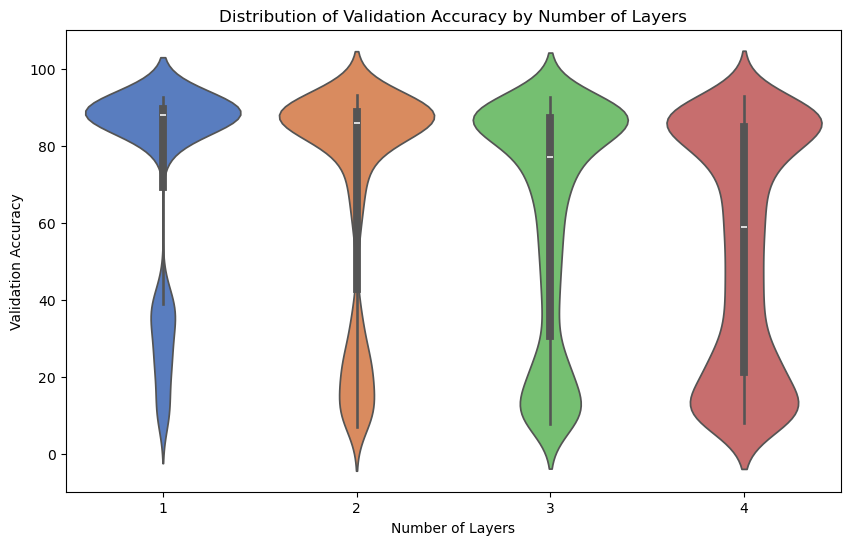

In [10]:
# 4.1 小提琴图：展示 num_layers 与 val_accuracy 的分布
plt.figure(figsize=(10, 6))
sns.violinplot(x="num_layers", y="val_accuracy", data=data, palette="muted")
plt.xlabel("Number of Layers")
plt.ylabel("Validation Accuracy")
plt.title("Distribution of Validation Accuracy by Number of Layers")
plt.show()


/var/folders/dz/ffb7x_vj5vl9758_4vqfvj3m0000gn/T/ipykernel_13894/3480790231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="units_per_layer", y="val_accuracy", data=data, palette="muted")


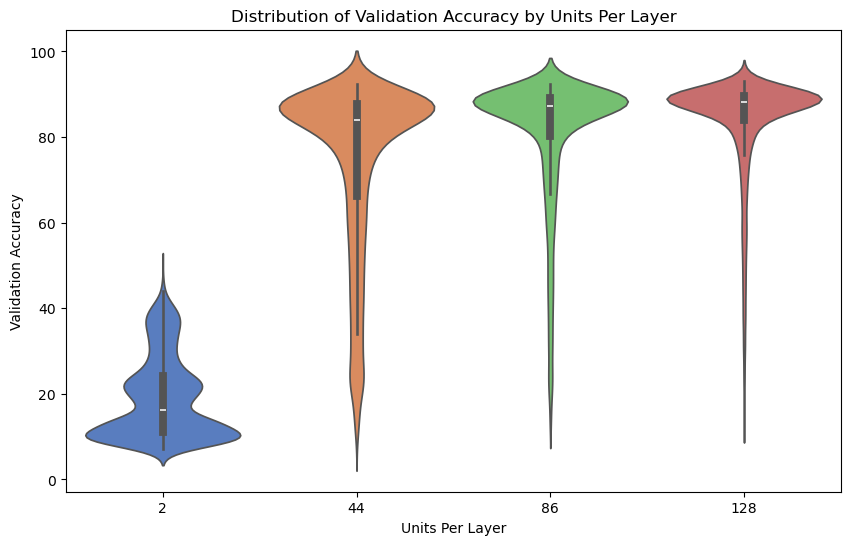

In [11]:
# 4.2 小提琴图：展示 units_per_layer 与 val_accuracy 的分布
plt.figure(figsize=(10, 6))
sns.violinplot(x="units_per_layer", y="val_accuracy", data=data, palette="muted")
plt.xlabel("Units Per Layer")
plt.ylabel("Validation Accuracy")
plt.title("Distribution of Validation Accuracy by Units Per Layer")
plt.show()



/var/folders/dz/ffb7x_vj5vl9758_4vqfvj3m0000gn/T/ipykernel_13894/3810981210.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="activation", y="val_accuracy", data=data, palette="muted")


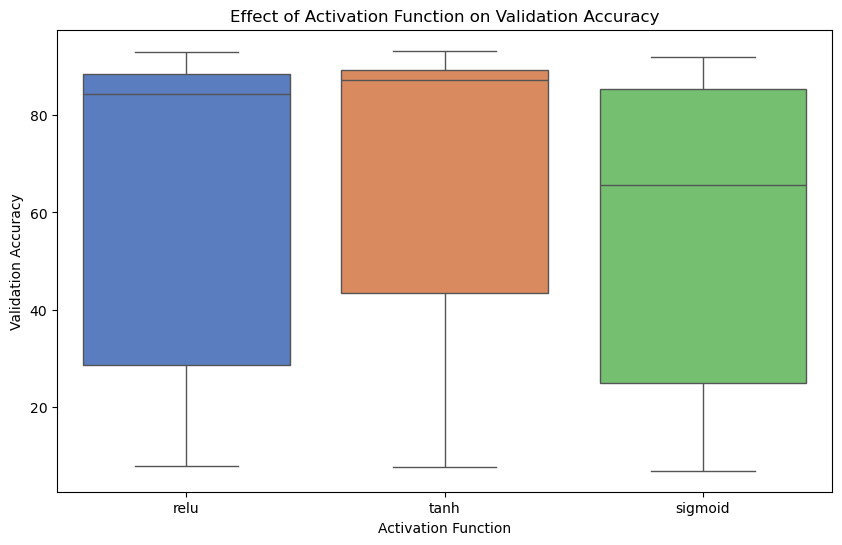

In [12]:
# 4.3 箱线图：展示 activation 函数对 val_accuracy 的影响
plt.figure(figsize=(10, 6))
sns.boxplot(x="activation", y="val_accuracy", data=data, palette="muted")
plt.xlabel("Activation Function")
plt.ylabel("Validation Accuracy")
plt.title("Effect of Activation Function on Validation Accuracy")
plt.show()



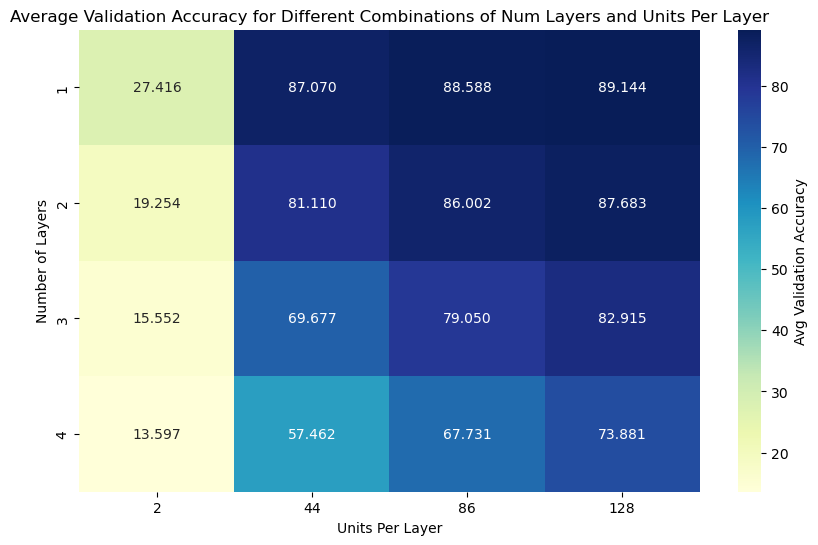

In [13]:
# 4.4 热力图：展示 num_layers 和 units_per_layer 对 val_accuracy 的组合影响
heatmap_data = data.groupby(['num_layers', 'units_per_layer'])['val_accuracy'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={'label': 'Avg Validation Accuracy'})
plt.xlabel("Units Per Layer")
plt.ylabel("Number of Layers")
plt.title("Average Validation Accuracy for Different Combinations of Num Layers and Units Per Layer")
plt.show()